---
layout: post
title:  "Tags on AO3: Visualization with Pie Chart"
date:   2021-05-23
category: visualization
tags: Python Pandas Matplotlib pie-chart
---

In this section, we're going to work on the other file from the AO3 data dump, the tags. 

* Table of Contents
{:toc}

# Loading File

In [1]:
# Load Python library
import pandas as pd

# Load file
path="/home/pi/Downloads/tags-20210226.csv"
chunker = pd.read_csv(path, chunksize=10000)
tags = pd.concat(chunker, ignore_index=True)

In [2]:
# Preview file
tags

,id,type,name,canonical,cached_count,merger_id
0,1,Media,TV Shows,True,910,NaN
1,2,Media,Movies,True,1164,NaN
2,3,Media,Books & Literature,True,134,NaN
3,4,Media,Cartoons & Comics & Graphic Novels,True,166,NaN
4,5,Media,Anime & Manga,True,501,NaN
...,...,...,...,...,...,...
14467133,55395603,Freeform,Redacted,False,0,NaN
14467134,55395606,Freeform,Redacted,False,0,NaN
14467135,55395609,Freeform,Redacted,False,0,NaN
14467136,55395612,Freeform,Redacted,False,0,NaN


# Exploring Data

In [3]:
# Find tag types
tags.type.unique()

array(['Media', 'Rating', 'ArchiveWarning', 'Category', 'Character',
       'Fandom', 'Relationship', 'Freeform', 'UnsortedTag'], dtype=object)

In [4]:
# Find subcategories of Media type tag
tags[tags['type'] == 'Media'].name.unique()

array(['TV Shows', 'Movies', 'Books & Literature',
       'Cartoons & Comics & Graphic Novels', 'Anime & Manga',
       'Music & Bands', 'Celebrities & Real People', 'Other Media',
       'Video Games', 'No Media', 'Uncategorized Fandoms', 'Theater'],
      dtype=object)

# Cleaning and Manipulating Data

Visualize the Media tags according to its cached_count

In [5]:
# Visualize the Media tags according to its cached_count
# Prepare data set
# Select columns

subset = tags[['type', 'name', 'cached_count']].copy()
subset

,type,name,cached_count
0,Media,TV Shows,910
1,Media,Movies,1164
2,Media,Books & Literature,134
3,Media,Cartoons & Comics & Graphic Novels,166
4,Media,Anime & Manga,501
...,...,...,...
14467133,Freeform,Redacted,0
14467134,Freeform,Redacted,0
14467135,Freeform,Redacted,0
14467136,Freeform,Redacted,0


In [6]:
# Select all names that type is media

media = subset[subset['type'] == 'Media'].drop('type',axis=1)
media

,name,cached_count
0,TV Shows,910
1,Movies,1164
2,Books & Literature,134
3,Cartoons & Comics & Graphic Novels,166
4,Anime & Manga,501
5,Music & Bands,19
6,Celebrities & Real People,33
7,Other Media,11
388,Video Games,448
4510,No Media,0


# Matplotlib Pie Chart

In [7]:
# Import libraries
# Top line is Jupyter Notebook specific

%matplotlib inline

import matplotlib.pyplot as plt

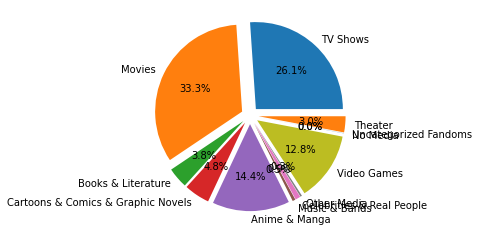

In [8]:
# Visualization pie chart
# with matplotlib

explode = [0.1] * len(media.name)

fig, axes = plt.subplots()
ax = axes.pie(media.cached_count, labels=media.name, explode=explode, autopct='%1.1f%%')

# Modifying data set for a better graph

Sort the data, find quantile, group lower values together

In [9]:
# Sort the dataframe in descending order
# Use inplace=True to edit the existing dataframe

media.sort_values(by='cached_count',ascending=False, inplace=True, ignore_index=True)
media

,name,cached_count
0,Movies,1164
1,TV Shows,910
2,Anime & Manga,501
3,Video Games,448
4,Cartoons & Comics & Graphic Novels,166
5,Books & Literature,134
6,Theater,104
7,Celebrities & Real People,33
8,Music & Bands,19
9,Other Media,11


In [11]:
# Find 50th quantile values

qt_50 = media.cached_count.quantile(.50)
qt_50

119.0

In [60]:
# Group values below 50th quantile
# Find what rows to drop
drop_rows = media[media['cached_count'] <= qt_50].copy()
drop_rows

,name,cached_count
6,Theater,104
7,Celebrities & Real People,33
8,Music & Bands,19
9,Other Media,11
10,Uncategorized Fandoms,1
11,No Media,0


In [14]:
# Find the sum of drop_rows values

add_value = media[media['cached_count'] <= qt_50].cached_count.sum()
add_value

168

In [15]:
# Edit media dataframe
# Add a new row Other
# Add new value as cached_count

media2 = media[media['cached_count'] > qt_50].append({'name':'Other','cached_count':add_value}, ignore_index=True)
media2

,name,cached_count
0,Movies,1164
1,TV Shows,910
2,Anime & Manga,501
3,Video Games,448
4,Cartoons & Comics & Graphic Novels,166
5,Books & Literature,134
6,Other,168


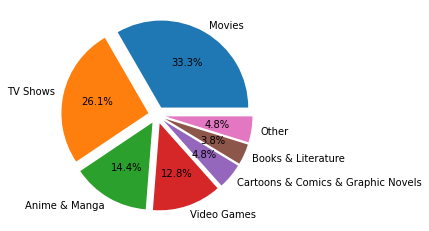

In [29]:
# pie chart with new media2 dataframe

explode = [0.1] * len(media2.name)

fig,axes = plt.subplots()

ax = axes.pie(media2.cached_count, labels=media2.name, explode=explode, autopct='%1.1f%%')


# Matplotlib Table

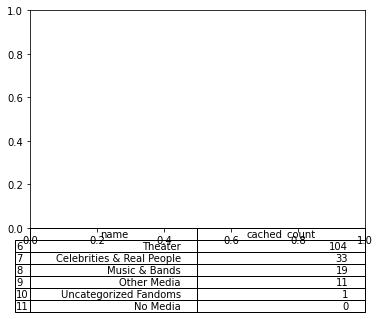

In [24]:
# Test pandas.plotting.table()

fig,ax = plt.subplots()
ax = pd.plotting.table(ax,data=drop_rows)

In [61]:
# Edit drop_rows dataframe
# Add a new column of percentage
drop_rows['Percentage'] = (drop_rows.cached_count / media.cached_count.sum() * 100).round(2)
drop_rows

,name,cached_count,Percentage
6,Theater,104,2.98
7,Celebrities & Real People,33,0.95
8,Music & Bands,19,0.54
9,Other Media,11,0.32
10,Uncategorized Fandoms,1,0.03
11,No Media,0,0.00


In [62]:
# Drop cached_count
# Change column name
drop_rows.drop('cached_count', axis=1, inplace=True)
drop_rows.columns = ['Other', 'Percentage']
drop_rows

,Other,Percentage
6,Theater,2.98
7,Celebrities & Real People,0.95
8,Music & Bands,0.54
9,Other Media,0.32
10,Uncategorized Fandoms,0.03
11,No Media,0.00


# Plotting Pie Chart and Table

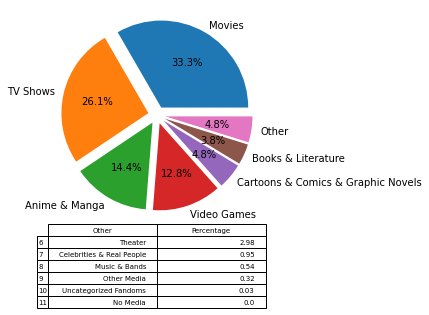

In [63]:
explode = [0.1] * len(media2.name)

fig,axes = plt.subplots()

ax = axes.pie(media2.cached_count, labels=media2.name, explode=explode, autopct='%1.1f%%')
table = pd.plotting.table(axes,data=drop_rows)